# Linear Regression - Project
To decide for the company to focus on their Mobile App or their Website.

### Importing the necessitites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
customers = pd.read_csv('Ecommerce Customers')

Checking the details of the data.

In [29]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [30]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [31]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploratory Data Analysis

In [7]:
sns.set_style(style = 'whitegrid')

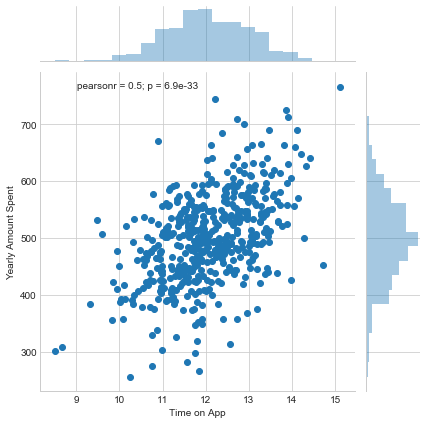

In [32]:
sns.jointplot(data = customers, x= data['Time on App'], y = data['Yearly Amount Spent'])

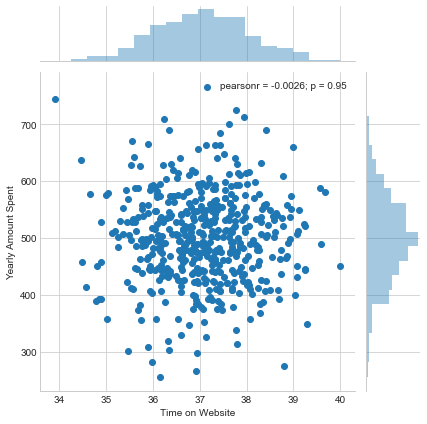

In [33]:
sns.jointplot(data['Time on Website'], data['Yearly Amount Spent'], customers)

It can be observed that there is a better correlation between the **Time On App** and **Yearly Amount Spent**

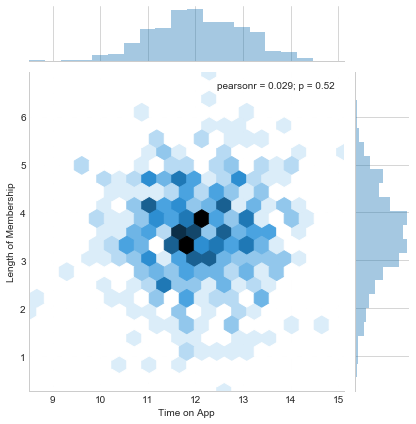

In [34]:
sns.jointplot(data['Time on App'],data['Length of Membership'], customers,kind = 'hex')

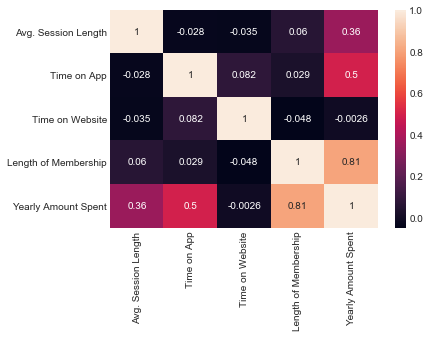

In [100]:
sns.heatmap(customers.corr(), annot = True)

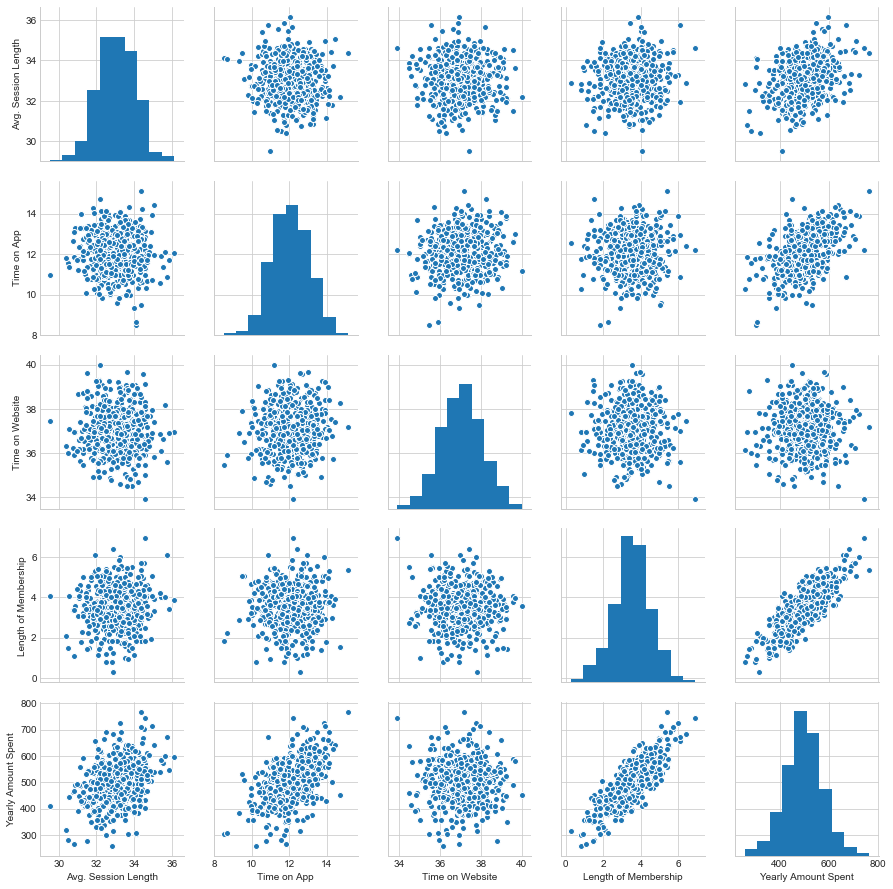

In [35]:
sns.pairplot(customers)

Based on the above pairplot **Length Of Membership** seems to be most correlated value.

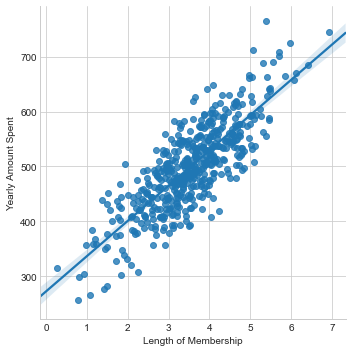

In [36]:
sns.lmplot(x ='Length of Membership', y = 'Yearly Amount Spent', data = customers)

### Splitting the data

In [37]:
from sklearn.cross_validation import train_test_split

In [83]:
X = customers.iloc[:,3:7]
Y = customers.iloc[:,7]

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 101)

### Training the Model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regressor = LinearRegression()

In [87]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
regressor.coef_

array([26.06944865, 38.67556383,  0.2518291 , 61.31057149])

### Predicting the values

In [89]:
Y_pred = regressor.predict(X_test)

### Observing the relation beween Predicted and Actual Values

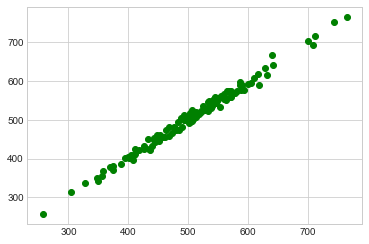

In [90]:
plt.plot(Y_test, Y_pred,'go')

The predicted values are very accurate as can be observed

## Evaluating the Model
Evaluating on the Regression Metrics

In [91]:
from sklearn import metrics

In [92]:
print("MAE: "+str(metrics.mean_absolute_error(Y_test, Y_pred)))
print("MSE: "+str(metrics.mean_squared_error(Y_test, Y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

MAE: 7.419686968689805
MSE: 83.47418226288592
RMSE: 9.136420648311127


### Verifying the Residuals

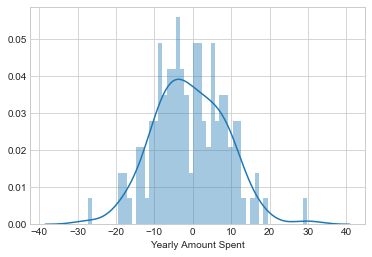

In [93]:
sns.distplot((Y_test-Y_pred), bins = 50)

We can observe that we get a Normal Distribution for the residuals.

## Conclusion
More the **App** or **Website** time, the **Membership** time is most important for the payments.

In [97]:
pd.DataFrame(data  =regressor.coef_, index = X_train.columns, columns = ['Coefficients'])

,Coefficients
Avg. Session Length,26.069449
Time on App,38.675564
Time on Website,0.251829
Length of Membership,61.310571


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

We can clearly observe that **length of Membership** matters the most, however the answer to company's question of focusing on **App** or **Website** will be the **App**. However before coming to the finally conclusion we would want to explore the relation between the **Length of Membership** and the **Time On App** more.